#### 기본적인 추천시스템 
 - 협업필터링(Collaborative Filtering)
 - 콘텐츠 기반 필터링(Contents-based Filtering)
 - 한 마디로, 추천시스템은 '아이템은 매우 많고' '유저의 취향은 다양할 때' 유저가 소비할 만한 아이템을 예측하는 모델.

#### Collaborative Filtering
 - 대규모의 기존 사용자 행동 정보를 분석하여 해당 사용자와 비슷한 성향의 사용자들이 기존에 좋아했던 항목을 추천하는 기술
 - 핵심 : 비슷한 패턴을 가진 사용자나 항목을 추출하는 기술
 - 장점 : 직관적이고 항목의 구체적인 내용을 분석할 필요 x
 - 한계1 : Cold Start Issue
 - 한계2 : 계산량이 많아서 사용자 수가 많은 경우 효율적으로 추천할 수 없다 (e.g. MF)
 - 한계3 : Long Tail 이슈 -> 사용자들에게 인기 있는 항목은 전체에서 소수 (비대칭적 쏠림)
 - Matrix Factorization & k-Nearest Neighbor Algorithm (kNN)
 - Amazon, Last fm, Facebook, LinkedIn

#### Contents-based Filtering
 - 항목 자체를 분석하여 추천을 구현  
  -> e.g.) 음악을 추천하기 위해 음악 자체를 분석하여 유사한 음악을 추천  
 - Item Profile과 User Profile의 유사성을 계산  
   - Item Profile : 항목을 분석한 프로파일   
     -> e.g.) 음악의 장르, 비트, 음색 등)  
   - User Profile : 사용자의 선호도를 추출한 프로파일  
     -> e.g.) 사용자가 like한 음악의 특색들  
 - 핵심 : 아이템 분석 알고리즘  
 - 군집분석(Clustering Analysis), 인공신경망(Artificial Neural Network), tf-id(term frequency - inverse document frequency) 등의 기술이 사용됨.
 - 장점 : No Cold Start Issue
 - 단점 : 다양한 형식의 항목을 추천하기 어렵다.
 - 현재는 많이 쓰이지 않음.

#### Model-Based Collaborative Filtering Algorithm
 - 협업필터링 + 자료 안에 내재한 패턴 이용
 - 핵심 : 자료 안에 내재되어 있는 패턴을 알아내는 것
 - LDA(Latent Dirichlet Allocation), 베이지안 네트워크(Bayesian Network) 등의 알고리즘이 사용됨.

#### Filter Bubble
  - 추천 시스템이 고도화될 수록 사용자의 입맛에 맞는 정보만 제공되고 나머지 정보는 감추어지는 위험이 생김
  - 상품이나 광고에 비해 뉴스나 정보의 경우 예기치 않은 정보의 차단이 문제가 될 수 있음

In [74]:
import implicit
import pandas as pd
import os
import seaborn as sns

In [50]:
# os.getenv('HOME')+'/...'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']
d_orig = pd.read_csv('../TIL/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv',
            sep='\t', names=col_names)
d = d_orig.copy()
print(d.shape)
d.head(3)

(17535655, 4)


,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897


=>> we don't use 'artist_MBID' column

In [51]:
using_cols = ['user_id', 'artist', 'play']
d = d[using_cols]
d.head(3)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897


In [52]:
# in order to search easily : lower the letters
d['artist'] = d['artist'].str.lower()
d.head(3)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897


#### user "00000c289a1829a808ac09c00daf10bc3c4e223b"'s artists

In [53]:
d.loc[0,'user_id']   # df[row_num, col_num]

'00000c289a1829a808ac09c00daf10bc3c4e223b'

In [54]:
con = d['user_id'] == d.loc[0,'user_id']
print(type(con))
con.head(2)

<class 'pandas.core.series.Series'>


0    True
1    True
Name: user_id, dtype: bool

In [7]:
con

0            True
1            True
2            True
3            True
4            True
            ...  
17535650    False
17535651    False
17535652    False
17535653    False
17535654    False
Name: user_id, Length: 17535655, dtype: bool

In [55]:
condition = (d['user_id']==d.loc[0,'user_id'])
print(d.loc[condition].shape)
d.loc[condition].tail(5)

(49, 3)


,user_id,artist,play
44,00000c289a1829a808ac09c00daf10bc3c4e223b,betty,135
45,00000c289a1829a808ac09c00daf10bc3c4e223b,l7,135
46,00000c289a1829a808ac09c00daf10bc3c4e223b,bif naked,134
47,00000c289a1829a808ac09c00daf10bc3c4e223b,girlschool,134
48,00000c289a1829a808ac09c00daf10bc3c4e223b,the wallflowers,131


## EDA

In [56]:
d.head(2)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099


In [57]:
d.tail(2)

,user_id,artist,play
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10


In [58]:
d['len_user_id'] = d['user_id'].apply(lambda x:len(x))
d.head(2)

,user_id,artist,play,len_user_id
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137,40
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099,40


In [59]:
d['len_user_id'].unique()

array([40, 12])

In [60]:
d = d[d['len_user_id']==40]
print(d.shape)
d.tail(3)

(17535569, 4)


,user_id,artist,play,len_user_id
17535604,ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac,alice cooper,59,40
17535605,ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac,lamb of god,58,40
17535606,ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac,dragonforce,57,40


In [61]:
# how many users?
d['user_id'].nunique()   # 358,866 users

358866

In [62]:
# how many artists?
d['artist'].nunique()   # 291,346 artists

291346

=>> Relatively, here are small number of users and large number of artists.

In [64]:
# who are popular artists?
artist_cnt = d.groupby('artist')['user_id'].count()
artist_cnt.sort_values(ascending=False).head(5)

artist
radiohead                77253
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
Name: user_id, dtype: int64

=>> how many users listend to particular artist?  
=>> Here, 77,253 users heard to musics of 'radiohead'(famoous   England Band), who was the most popular artist.  

=>> On the other hand, which artists were not so popular? T.T

In [68]:
artist_cnt.sort_values(ascending=False).tail(5)

artist
jesus the ghost           1
jesus serrano             1
jesus revolution          1
jesus kommt aus bützow    1
 04)]                     1
Name: user_id, dtype: int64

=>> there are many artists who got only 1 view.  
=>> then, how many artists got only 1 view?   
=>> The popularity is biased a lot? (skewed?)  

In [89]:
artist_cnt.describe()

count    291346.000000
mean         60.187423
std         673.637466
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       77253.000000
Name: user_id, dtype: float64

=>> oh, there are a lot of artists who've got only 1 view.  
=>> seems to make sense... since there are a lot of artists.  
=>> **Remind** This data has about 360,000 users and 300,000 artists.  
=>> Also let's note that one user can listen to many different artists' musics.

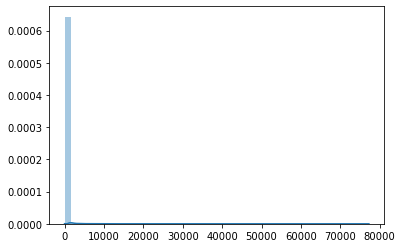

In [119]:
sns.distplot(artist_cnt.values)

In [112]:
artist_cnt.values

array([1, 4, 1, ..., 1, 1, 1])

In [48]:
# how many artists each user is listening to
user_cnt = d.groupby('user_id')['artist'].count()
user_cnt.describe()

count    358866.000000
mean         48.863267
std           8.524276
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

=>> each user listened to musics of 49 different artistis in average  
=>> One user has listened to 166 different artists..!

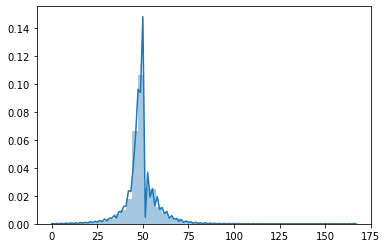

In [118]:
sns.distplot(user_cnt.values)

In [104]:
user_cnt.head(3)

user_id
00000c289a1829a808ac09c00daf10bc3c4e223b    49
00001411dc427966b17297bf4d69e7e193135d89    51
00004d2ac9316e22dc007ab2243d6fcb239e707d    46
Name: artist, dtype: int64

=>> how many artists each user(every one user)

In [49]:
# statistics about median value of 'play_count's per user
user_median = d.groupby("user_id")['play'].median()
user_median.describe()

count    358866.000000
mean        142.188130
std         213.090391
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

In [ ]:
user_

In [49]:
tmp = d.groupby("user_id")['play']
tmp.count()

user_id
00000c289a1829a808ac09c00daf10bc3c4e223b    49
00001411dc427966b17297bf4d69e7e193135d89    51
00004d2ac9316e22dc007ab2243d6fcb239e707d    46
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf    49
00007a47085b9aab8af55f52ec8846ac479ac4fe    50
                                            ..
fffe8637bd8234309e871409c7ebef99a720afc1    48
fffe8c7f952d9b960a56ed4dcb40a415d924b224    62
ffff9af9ae04d263dae91cb838b1f3a6725f5ffb    21
ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac    50
sep 20, 2008                                48
Name: play, Length: 358868, dtype: int64

In [52]:
tmp.count().describe()

count    358868.000000
mean         48.863802
std           8.524191
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: play, dtype: float64

#### user profile setting

In [57]:
d['artist'].unique()[0:5]

array(['betty blowtorch', 'die ärzte', 'melissa etheridge', 'elvenking',
       'juliette & the licks'], dtype=object)

In [ ]:
my_fav = ['coldplay','girlschool','queen','beyoncé','boris']


In [ ]:
my_favorite = ['black eyed']

'/Users/hwan'

In [ ]:
fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)